In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
X, Y = datasets.make_circles(n_samples = 1500, noise = 0.09, factor = 0.6)
x = X[:1000]
y = Y[:1000]
x_test = X[1000:1500]
y_test = Y[1000:1500]

(-1.5, 1.5)

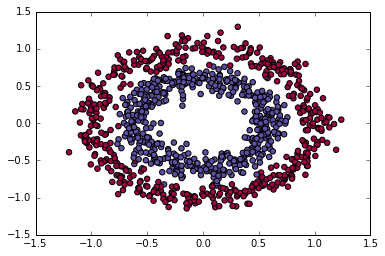

In [3]:
fig = plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

In [4]:
N = 1000 
H = 100 #length of hidden_layer
D = 2 #dimension
R = 2 
W = np.random.uniform(-.05, .05,(D,H))
b = np.random.uniform(-.05, .05, (1,H))
U = np.random.uniform(-.05, .05, (H,R))
c = np.random.uniform(-.05, .05, (1,R))

In [5]:
print W.shape
print b.shape
print U.shape

(2L, 100L)
(1L, 100L)
(100L, 2L)


In [6]:
def softmax(x):
    exp_scores = np.exp(x)
    probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)
    return probs

In [7]:
class toyNN:
    def __init__(self, x, epoch = 10000, step_size = 0.05, reg = 0.001):
        self.W = np.random.uniform(-.05, .05,(D,H))
        self.b = np.random.uniform(-.05, .05, (1,H))
        self.U = np.random.uniform(-.05, .05, (H,R))
        self.c = np.random.uniform(-.05, .05, (1,R))
        self.epoch = epoch
        self.h = np.zeros((N, H)) #hidden_layer
        self.o = np.zeros((N, R)) #output probability
        self.y_o = np.zeros(N)    #class_index
        self.x = x
        self.y = y
        self.step_size = step_size
        self.reg = reg
    def forward_propagation(self):
        self.h = np.maximum(self.x.dot(self.W) + self.b, 0)
        self.o = self.h.dot(self.U) + self.c
        self.y_o = softmax(self.o)
        return [self.o,self.y_o]
    def caculate_gradient(self):
        o, y_o = self.forward_propagation()
        
        data_loss = np.sum(-np.log(y_o[range(N),y]))/N
        reg_loss = 0.5*self.reg*np.sum(self.W*self.W) + 0.5*self.reg*np.sum(self.U*self.U)
        loss = data_loss + reg_loss
        dscore = y_o
        dscore[range(N),self.y] -= 1
        dscore /= N
        
        #print dscore.shape
        #print self.h.shape
        
        dLdU = self.h.T.dot(dscore)
        dLdc = np.sum(dscore, axis=0, keepdims=True)
        
        dUpper = np.dot(dscore, U.T)
        dUpper[self.h < 0] = 0
        
        dHidden = dUpper
        
        dLdW = np.dot(x.T,dHidden)
        dLdb = np.sum(dHidden, axis=0, keepdims=True)
        #print dLdU.shape
        #print dLdc.shape
        #print dLdW.shape
        #print dLdb.shape
        #print self.h<0
        
        
        return dLdU,dLdc,dLdW,dLdb,loss
    def gradient_descent(self):
        dLdU,dLdc,dLdW,dLdb,loss = self.caculate_gradient()
        self.loss = loss
        
        self.U += self.reg*self.U
        self.W += self.reg*self.W
        self.U -= self.step_size*dLdU
        self.c -= self.step_size*dLdc
        self.W -= self.step_size*dLdW
        self.b -= self.step_size*dLdb
        
        

In [8]:
toy = toyNN(x,10000, 0.03, 0.0005)
for i in range(5001):
    toy.gradient_descent()
    if i%1000 == 0:
        print "at step %d, loss is: %f"%(i,toy.loss)
        
s, o = toy.forward_propagation()
class_predict = np.argmax(o,axis=1)
print 'training accuracy: %.8f' % (np.mean(class_predict == y))
U,c,W,b = toy.U,toy.c,toy.W,toy.b
class_test = np.dot(np.maximum(np.dot(x_test,W)+b, 0),U)+c
class_test = np.argmax(class_test,axis=1)
print 'the testing accuracy: %.8f' % (np.mean(class_test == y_test))


at step 0, loss is: 0.693178
at step 1000, loss is: 0.675262
at step 2000, loss is: 0.596522
at step 3000, loss is: 0.425755
at step 4000, loss is: 0.242991
at step 5000, loss is: 0.155765
training accuracy: 0.96700000
the testing accuracy: 0.96600000


In [9]:
h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), U) + c
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

In [10]:
xx.shape

(223L, 222L)

(-1.5, 1.5)

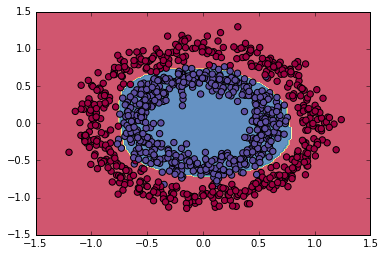

In [11]:
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)